In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Условия
a = 1
k = 1
h = 0.1
tau = 0.01
T = 0.1

Запишем данные задачи для решения

In [3]:
# Задаем первое начальное распределение
def phi_1(x):
    if a/3 <= x <= 2*a/3:
        return 2
    else:
        return 0

# Задаем второе начальное распределение
def phi_2(x):
    if a/2 <= x <= a:
        return 2
    else:
        return 0

Имея формулу для коэффициентов для точного решения:

$$\alpha_n=\frac{2}{a}\int\limits_{0}^a \phi(x)\sin \frac{\pi n x}{a}dx$$

Посчитаем явно интегралы и получим что они имеют вид:

Для $\phi_1$:
$$\alpha_n=\frac{4}{\pi n} \left(cos\left(\frac{\pi \cdot n}{3}\right) - cos\left(\frac{2 \pi \cdot n}{3}\right) \right)\$$

Для $\phi_2$:
$$\alpha_n=\frac{4}{\pi n} \left(cos\left(\frac{\pi \cdot n}{2}\right) - cos\left(\pi \cdot n\right) \right)\$$


In [4]:
# Вычисляем коэффициенты Фурье
def alpha_1(n):
    return (4/(np.pi*n))*(np.cos(np.pi*n/3) - np.cos(2*np.pi*n/3))

def alpha_2(n):
    return (4/(np.pi*n))*(np.cos(np.pi*n/2)-np.cos(np.pi*n))

Вычисляем точное решение для разных $\phi(x)$

In [5]:
# Точное решение задачи
def u_exact_1(x, t):
    res = 0
    for n in range(1, 100):
        res += alpha_1(n)*np.exp(-(k*(np.pi**2)*(n**2)*t)/(a**2))*np.sin((np.pi*n*x)/a)
    return res

def u_exact_2(x, t):
    res = 0
    for n in range(1, 100):
        res += alpha_2(n)*np.exp(-(k*(np.pi**2)*(n**2)*t)/(a**2))*np.sin((np.pi*n*x)/a)
    return res

Реализуем метод Рунге-Кутта 4 порядка:

In [6]:
def runge_kutta_4(u, N, M, phi, h, tau, k):
    u = np.zeros((N, M))
    u[:,0] = [phi(i*h) for i in range(N)]

    for j in range(M-1):
        for i in range(1, N-1):
            k1 = k*tau*(u[i-1,j] - 2*u[i,j] + u[i+1,j])/(h**2)
            k2 = k*tau*(u[i-1,j] - 2*(u[i,j]+0.5*k1) + u[i+1,j])/(h**2)
            k3 = k*tau*(u[i-1,j] - 2*(u[i,j]+0.5*k2) + u[i+1,j])/(h**2)
            k4 = k*tau*(u[i-1,j] - 2*(u[i,j]+k3) + u[i+1,j])/(h**2)
            u[i,j+1] = u[i,j] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
    return u

In [7]:
# Численное решение задачи методом Рунге-Кутта 4 порядка
N = int(a/h) + 1
M = int(T/tau) + 1
u1 = np.zeros((N, M))
u2 = np.zeros((N, M))

u = runge_kutta_4(u1, N, M, phi_1, h, tau, k)
w = runge_kutta_4(u2, N, M, phi_2, h, tau, k)

In [8]:
# Вычисляем точное решение в момент времени T
u_true_1 = np.zeros((N, 1))
for i in range(N):
    u_true_1[i,0] = u_exact_1(i*h, T)

# Вычисляем точное решение в момент времени T
u_true_2 = np.zeros((N, 1))
for i in range(N):
    u_true_2[i,0] = u_exact_2(i*h, T)

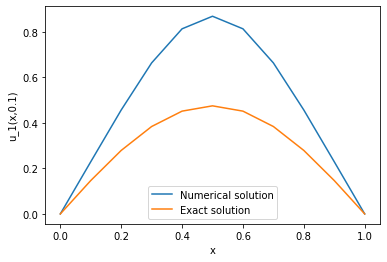

In [9]:
# Строим графики точного и приближенного решений
x_values = np.linspace(0, a, N)
plt.plot(x_values, u[:,M-1], label='Numerical solution')
plt.plot(x_values, u_true_1[:,0], label='Exact solution')
plt.xlabel('x')
plt.ylabel('u_1(x,0.1)')
plt.legend()
plt.show()

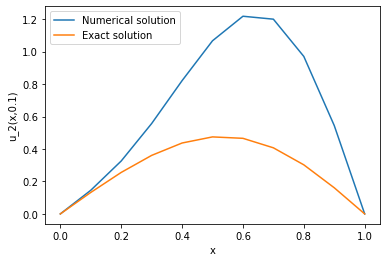

In [10]:
# Строим графики точного и приближенного решений
x2_values = np.linspace(0, a, N)
plt.plot(x2_values, w[:,M-1], label='Numerical solution')
plt.plot(x2_values, u_true_2[:,0], label='Exact solution')
plt.xlabel('x')
plt.ylabel('u_2(x,0.1)')
plt.legend()
plt.show()

In [13]:
# Измельчаем сетку вдвое
h1 = h/2
tau1 = tau/4
N1 = int(a/h1) + 1
M1 = int(T/tau1) + 1
u1 = np.zeros((N1, M1))

# и еще вдвое
h2 = h1/2
tau2 = tau1/4
N2 = int(a/h2) + 1
M2 = int(T/tau2) + 1
u2 = np.zeros((N2, M2))

In [14]:
u_1_1 = runge_kutta_4(u1, N1, M1, phi_1, h1, tau1, k)

u_1_2 = runge_kutta_4(u2, N2, M2, phi_1, h2, tau2, k)

diff_norm11 = np.linalg.norm(u - u_1_1[:u.shape[0], :u.shape[1]])
diff_norm12 = np.linalg.norm(u_1_1 - u_1_2[:u1.shape[0], :u_1_1.shape[1]])
# оцениваем порядок сходимости
p = np.log(diff_norm12/diff_norm11)/np.log(2)
print(f"Порядок сходимости 1: p = {p}")

u_2_1 = runge_kutta_4(u1, N1, M1, phi_2, h1, tau1, k)

u_2_2 = runge_kutta_4(u2, N2, M2, phi_2, h2, tau2, k)

diff_norm21 = np.linalg.norm(w - u_2_1[:w.shape[0], :w.shape[1]])
diff_norm22 = np.linalg.norm(u_2_1 - u_2_2[:u1.shape[0], :u_2_1.shape[1]])
# оцениваем порядок сходимости
p = np.log(diff_norm22/diff_norm21)/np.log(2)
print(f"Порядок сходимости 2: p = {p}")

Порядок сходимости 1: p = 1.3818021610415752
Порядок сходимости 2: p = 1.324708147790878
